### Task variant 20
* Classes count: $N = 4$
* Elements in class: $M = 536$
* Error min. $R1 = 0.49$ max. $R2 = 0.51$

In [81]:
N = 4
M = 536
R1 = 0.49
R2 = 0.51

DATA_FRAGMENTATION = 0.5
CLOUD_SHIFT = 0.55

GRAPH_POINT_SIZE = 30
GRAPH_POINT_ALPHA = 0.3

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#### Generating 2d Gaussian noise, $M$ points by 2 coordinates

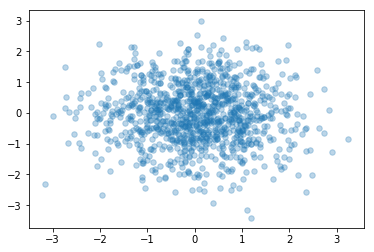

In [83]:
noise = np.random.randn(M * 2, 2) 
plt.scatter(noise[:,0], noise[:,1], s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

#### Shifting noise a bit to create clouds

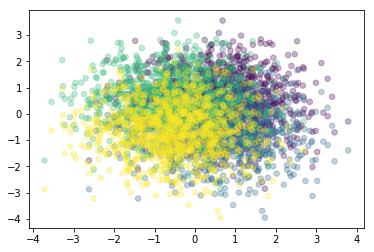

In [84]:
XY = np.vstack([
    noise + np.array([CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([CLOUD_SHIFT, -CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, -CLOUD_SHIFT])
])

annotations = [0] * M * 2 + [1] * M * 2 + [2] * M * 2 + [3] * M * 2

plt.scatter(XY[:,0], XY[:,1], c=annotations, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

In [85]:
for i in range(N):
    print(f"Cloud {i}:")
    print(f"Mean: {XY[i].mean()} \n Std: {XY[i].std()}\n Mean axis=0: {XY[i].mean(axis=0)}\n")

Cloud 0:
Mean: -0.12161752838992634 
 Std: 1.4807287209702547
 Mean axis=0: -0.12161752838992634

Cloud 1:
Mean: 2.058527055202476 
 Std: 0.918375617737186
 Mean axis=0: 2.058527055202476

Cloud 2:
Mean: 0.15603830875541128 
 Std: 0.07980138265369871
 Mean axis=0: 0.15603830875541128

Cloud 3:
Mean: 1.5349912693360068 
 Std: 0.4280973427200283
 Mean axis=0: 1.5349912693360068



#### Shuffling data, generating training and testing sets 

In [86]:
data, labels = shuffle(XY, annotations)

test_size = int(len(data) * DATA_FRAGMENTATION)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

#### Creating and fitting the model

In [87]:
clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(Xtrain, Ytrain);

#### Testing the model

In [88]:
predictions = clf.predict(Xtest)
confusion_matrix(Ytest, predictions)

array([[272, 113, 111,  41],
       [105, 279,  31, 114],
       [118,  51, 260, 109],
       [ 31, 123, 109, 277]], dtype=int64)

In [89]:
score = accuracy_score(Ytest, predictions)
is_fitting = R1 <= score and score <= R2

print(f"Score: {score} \n Fitting in accuracy range: {is_fitting}")

Score: 0.5074626865671642 
 Fitting in accuracy range: True


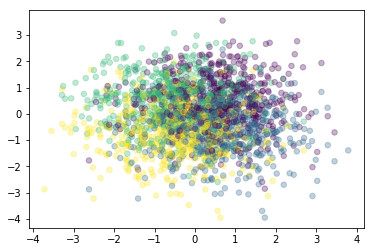

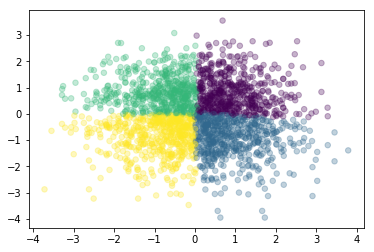

In [90]:
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()
plt.scatter(Xtest[:,0], Xtest[:,1], c=predictions, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()